# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
df_dum = pd.read_pickle('df_dum.pkl')
df_dum.shape

(850060, 101)

In [4]:
# summary statistics function

def eda_clean(df):
    print('Dataset Statistics:\n')
    print(f'Shape of dataframe: {df.shape}')
    print('--------------------------------------')
    print(f'Null values in dataframe: {df.isna().sum().sum()}')
    print('--------------------------------------')
    print(f'% of Null values in dataframe: {round(((df.isna().sum().sum())/(df.shape[0])) * 100, 2)}%')
    print('--------------------------------------')
    print(f"Total duplicate rows: {df[df.duplicated()].shape[0]}")
    print('--------------------------------------')
    print(f"% duplicate rows: {round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2)}%")
    print('\nVariable Types')
    print(f"Columns Count: \n{df.dtypes.value_counts()}")

In [5]:
eda_clean(df_dum)

Dataset Statistics:

Shape of dataframe: (850060, 101)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
--------------------------------------
% duplicate rows: 0.0%

Variable Types
Columns Count: 
int64      84
float64    15
object      2
dtype: int64


In [6]:
df_dum.columns

Index(['date', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'month', 'year', 'address', 'remaining_lease_years', 'max_floor_lvl',
       'commercial',
       ...
       'min_dist_mrt', 'school_5km', 'preschool_5km', 'mrt_5km', 'school_1km',
       'preschool_1km', 'mrt_1km', 'min_dist_attraction', 'min_dist_market',
       'min_dist_hawker'],
      dtype='object', length=101)

In [12]:
features = ['floor_area_sqm', 'month', 'remaining_lease_years', 'max_floor_lvl',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'own_units', 'flat_type_2 room',
       'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room',
       'flat_type_executive', 'flat_type_multi-generation',
       'flat_model_adjoined flat', 'flat_model_apartment', 'flat_model_dbss',
       'flat_model_improved', 'flat_model_improved-maisonette',
       'flat_model_maisonette', 'flat_model_model a',
       'flat_model_model a-maisonette', 'flat_model_model a2',
       'flat_model_multi generation', 'flat_model_new generation',
       'flat_model_premium apartment', 'flat_model_premium apartment loft',
       'flat_model_premium maisonette', 'flat_model_simplified',
       'flat_model_standard', 'flat_model_terrace', 'flat_model_type s1',
       'flat_model_type s2', 'storey_range_01 TO 05', 'storey_range_04 TO 06',
       'storey_range_06 TO 10', 'storey_range_07 TO 09',
       'storey_range_10 TO 12', 'storey_range_11 TO 15',
       'storey_range_13 TO 15', 'storey_range_16 TO 18',
       'storey_range_16 TO 20', 'storey_range_19 TO 21',
       'storey_range_21 TO 25', 'storey_range_22 TO 24',
       'storey_range_25 TO 27', 'storey_range_26 TO 30',
       'storey_range_28 TO 30', 'storey_range_31 TO 33',
       'storey_range_31 TO 35', 'storey_range_34 TO 36',
       'storey_range_36 TO 40', 'storey_range_37 TO 39',
       'storey_range_40 TO 42', 'storey_range_43 TO 45',
       'storey_range_46 TO 48', 'storey_range_49 TO 51', 'cbd_dist',
        'min_dist_attraction', 'min_dist_market', 'min_dist_hawker',
       'min_dist_preschool', 'min_dist_school', 'min_dist_mrt',
        'school_1km', 'preschool_1km', 'mrt_1km',
       'bldg_contract_town_BB', 'bldg_contract_town_BD',
       'bldg_contract_town_BH', 'bldg_contract_town_BM',
       'bldg_contract_town_BP', 'bldg_contract_town_BT',
       'bldg_contract_town_CCK', 'bldg_contract_town_CL',
       'bldg_contract_town_CT', 'bldg_contract_town_GL',
       'bldg_contract_town_HG', 'bldg_contract_town_JE',
       'bldg_contract_town_JW', 'bldg_contract_town_KWN',
       'bldg_contract_town_MP', 'bldg_contract_town_PG',
       'bldg_contract_town_PRC', 'bldg_contract_town_QT',
       'bldg_contract_town_SB', 'bldg_contract_town_SGN',
       'bldg_contract_town_SK', 'bldg_contract_town_TAP',
       'bldg_contract_town_TP', 'bldg_contract_town_WL',
       'bldg_contract_town_YS']

In [10]:
# dropped preschool, mrt and school (5km) as all the HDB houses are located within that distance.
df_dum.drop(columns=['date', 'year', 'address', 'preschool_5km', 'mrt_5km', 'school_5km', 'lease_commence_date'], inplace=True)

In [13]:
X=df_dum[features]
y=df_dum['resale_price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [15]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)
# reference: https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

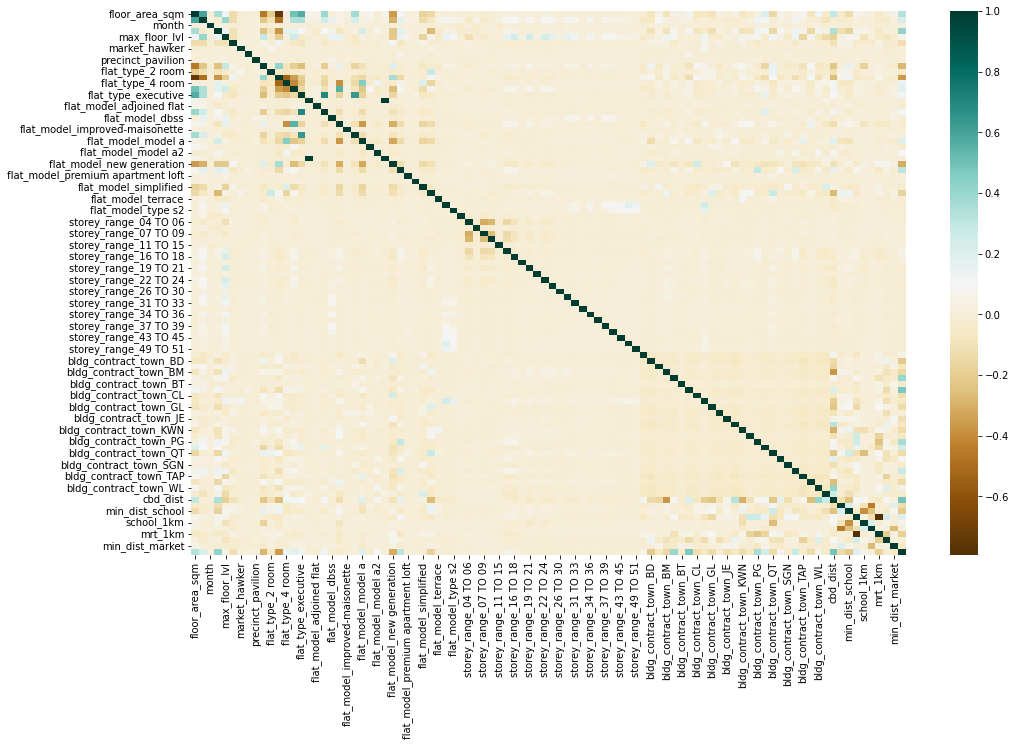

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df_dum.corr(), cmap='BrBG')

## Linear Regression (Unscaled) - Baseline

In [18]:
# instantiate
line=LinearRegression()

In [19]:
line.fit(X_train, y_train)

LinearRegression()

In [20]:
# scores
print(f'R^2 score on train data set = {line.score(X_train, y_train)}')
print(f'cross-val-score R^2 score on trained model = {cross_val_score(line, X_train, y_train, cv=5).mean()}')
print(f'R^2 score on test data set = {line.score(X_test, y_test)}')

R^2 score on train data set = 0.6993770595553408
cross-val-score R^2 score on trained model = 0.699241972289072
R^2 score on test data set = 0.6986329945915107


The scores are pretty good enough for our training data set. Our test data set has also fit to the model quite decently. 

# Scaling

In [21]:
# our features have different magnitudes.
# we do not want outliers affecting the model too sharply.
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

## Linear Regression

In [23]:
line.fit(Z_train, y_train)

LinearRegression()

In [24]:
# scores
print(f'R^2 score on train data set = {line.score(Z_train, y_train)}')
print(f'cross-val-score R^2 score on trained model = {cross_val_score(line, Z_train, y_train, cv=5).mean()}')
print(f'R^2 score on test data set = {line.score(Z_test, y_test)}')

R^2 score on train data set = 0.6993770596209488
cross-val-score R^2 score on trained model = 0.6992418775458227
R^2 score on test data set = 0.6986329977448289


In [25]:
y_pred_lr = line.predict(Z_test)

In [26]:
# mae
mean_absolute_error(y_test, y_pred_lr)

63413.64976524064

The R^2 score for the training data set reduced slightly in the hundredths but improved in the hundredths for our test data set. There is nothing major in the result changes so we want to test out other models.

## RidgeCV

In [27]:
# Linear least squares with L2 regularization
from sklearn.linear_model import Ridge

In [28]:
# Instantiate.
# alpha is the Regularization strength. we're passing 10, instead of the default 1 for stronger regularization.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.6993764513949359
0.6986351827585786


In [29]:
# Ridge regression with "built-in" cross-validation (advancing from above approach w/o cv)
from sklearn.linear_model import RidgeCV

In [30]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5 (that is, in logscale).
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
# alphas: pass an Array of alpha values to try. It is still the Regularization strength
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5).fit(Z_train, y_train)# fitting 5-fold CV

In [31]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.6993770489417801
0.6986334054007058


In [32]:
# getting the optimal value of alpha from ridge cv
ridge_cv.alpha_

1.2618568830660204

In [33]:
y_pred_ridge = ridge_cv.predict(Z_test)

In [34]:
# mae
mean_absolute_error(y_test, y_pred_ridge)

63413.52208844459

## LassoCV

In [35]:
# Imports for Lasso
from sklearn.linear_model import Lasso, LassoCV

In [36]:
# Set up a list of Lasso alphas to check.
# np.logspace generates 100 values equally between -3 and 0,
# then converts them to alphas between 10^-3 and 1 (that is, in logscale).
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000).fit(Z_train, y_train);

In [37]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.6993769958843321
0.6986337383772153


In [38]:
# getting the optimal value of alpha from ridge cv
lasso_cv.alpha_

0.4641588833612782

In [39]:
y_pred_lasso = lasso_cv.predict(Z_test)

In [40]:
# mae
mean_absolute_error(y_test, y_pred_lasso)

63413.174545934235

## ElasticNetCV

In [41]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [42]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)# Return evenly spaced numbers over a specified interval

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(Z_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(Z_test)
enet_model_preds_train = enet_model.predict(Z_train)

# Evaluate model.
print(enet_model.score(Z_train, y_train))
print(enet_model.score(Z_test, y_test))

0.6650500273201934
0.6635455799366228


In [43]:
# Here is the optimal value of alpha.
enet_model.alpha_

0.5

In [44]:
y_pred_enet = enet_model.predict(Z_test)

In [45]:
# mae
mean_absolute_error(y_test, y_pred_enet)

67465.8263360054

## Decision Tree Regression


In [46]:
#instantiate
decision_tree = DecisionTreeRegressor()

In [47]:
decision_tree.fit(Z_train, y_train)

DecisionTreeRegressor()

In [48]:
decision_tree.score(Z_train, y_train)

0.9998326420923547

In [49]:
decision_tree.score(Z_test, y_test)

0.9456372263365362

In [50]:
y_pred_decisiontree = decision_tree.predict(Z_test)

In [51]:
# mae
mean_absolute_error(y_test, y_pred_decisiontree)

23653.47185524159

## Random Forest Regressor


In [52]:
# instantiate
rfc = RandomForestRegressor(n_estimators=10)

In [53]:
rfc.fit(Z_train, y_train)

RandomForestRegressor(n_estimators=10)

In [54]:
rfc.score(Z_train, y_train)

0.9939859591489189

In [55]:
y_pred_rfc = rfc.predict(Z_test)

In [56]:
rfc.score(Z_test, y_test)

0.9684775143143439

In [57]:
# mae
mean_absolute_error(y_test, y_pred_rfc)

18736.100067433425

# Saving the Model

In [58]:
df_dum.shape

(850060, 94)

In [59]:
from joblib import dump, load
dump(rfc, 'rfc.joblib')

['rfc.joblib']